In [396]:
import pandas as pd
data_frame=pd.read_csv("C:\\Users\\Ayşenur\\Downloads\\diabetes.csv")
data_frame


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [397]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [398]:
data_frame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [399]:
data_frame.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [400]:
data_frame.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [401]:
X=data_frame.iloc[:,:-1]
y=data_frame.iloc[:,-1]
columns=X.columns
for i in columns:
    q1=X[i].quantile(0.25)
    q3=X[i].quantile(0.75)
    iqr=q3-q1
    altlimit=q1-1.5*iqr
    üstlimit=q3+1.5*iqr
    z=(X[i]<üstlimit)&(X[i]>altlimit)
    X=X[(X[i]<üstlimit)&(X[i]>altlimit)]
    y=y[z]

In [402]:
import numpy as np
X[['Glucose','BloodPressure','BMI']] = X[['Glucose','BloodPressure','BMI']].replace(0,np.NaN)
print(X.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


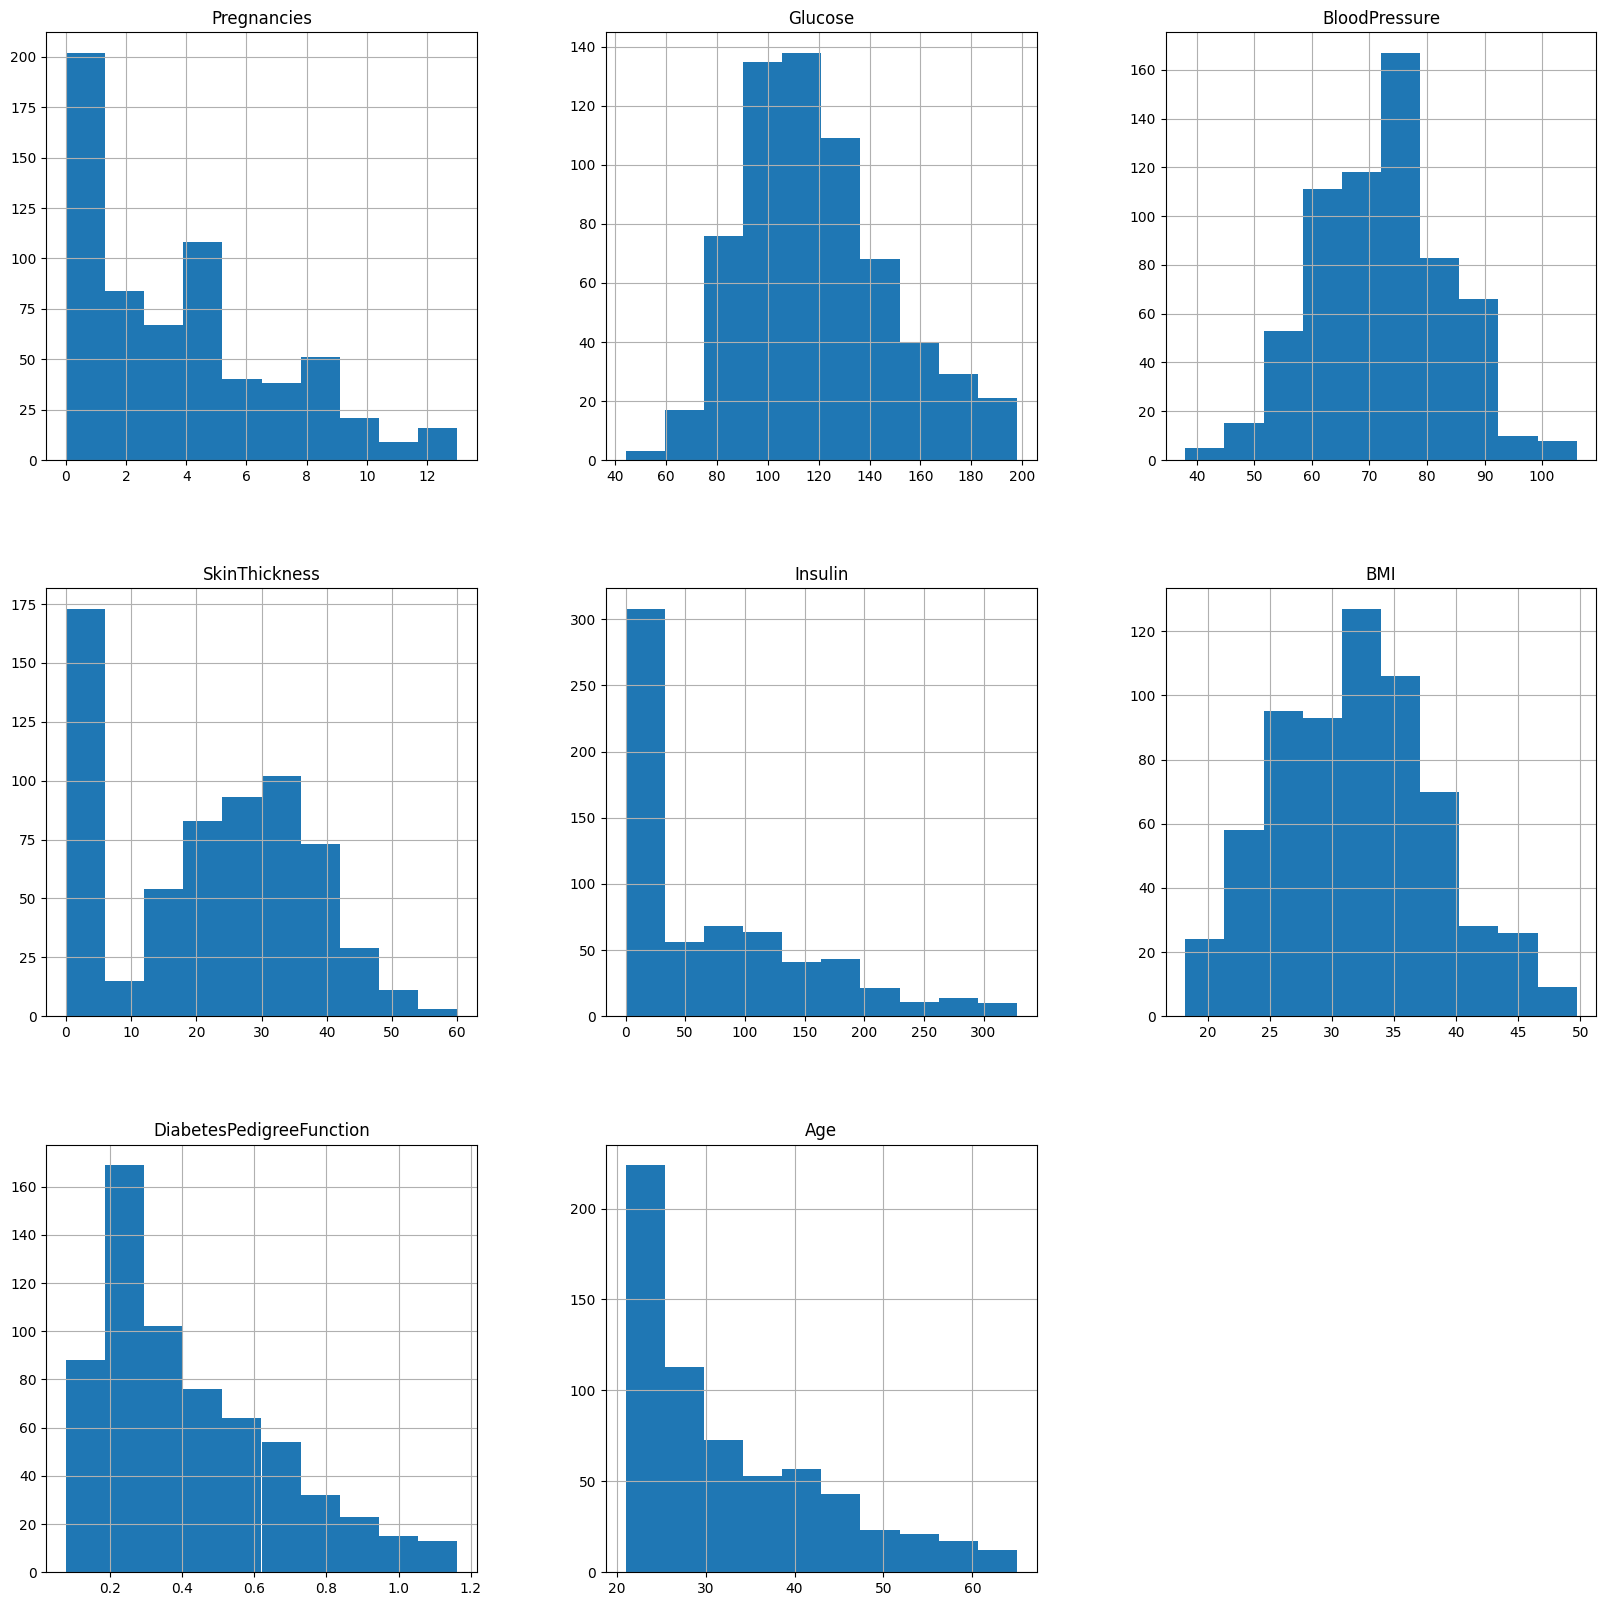

In [403]:
import matplotlib.pyplot as plt
p = X.hist(figsize = (20,20))

In [404]:
X["Glucose"].fillna(X["Glucose"].median(),inplace=True)
X["BloodPressure"].fillna(X["BloodPressure"].median(),inplace=True)
X["BMI"].fillna(X["BMI"].mean(),inplace=True)

C:\Users\Ayşenur\AppData\Local\Temp\ipykernel_14708\2238646003.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["Glucose"].fillna(X["Glucose"].median(),inplace=True)
C:\Users\Ayşenur\AppData\Local\Temp\ipykernel_14708\2238646003.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [405]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x_train)
sc.fit(x_test)

StandardScaler()

In [406]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=[]
best=0
besti=0
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_pred,y_test)
    accuracy.append(acc)
    if accuracy[i-1]>best:
        best=accuracy[i-1]
        besti=i
print(accuracy)
print(best)
print(besti)
print(confusion_matrix(y_test,y_pred))

[0.7329842931937173, 0.7225130890052356, 0.7225130890052356, 0.7120418848167539, 0.7172774869109948, 0.7120418848167539, 0.7277486910994765, 0.7277486910994765, 0.7382198952879581, 0.7382198952879581, 0.7382198952879581, 0.7277486910994765, 0.743455497382199, 0.743455497382199]
0.743455497382199
13
[[120   5]
 [ 44  22]]


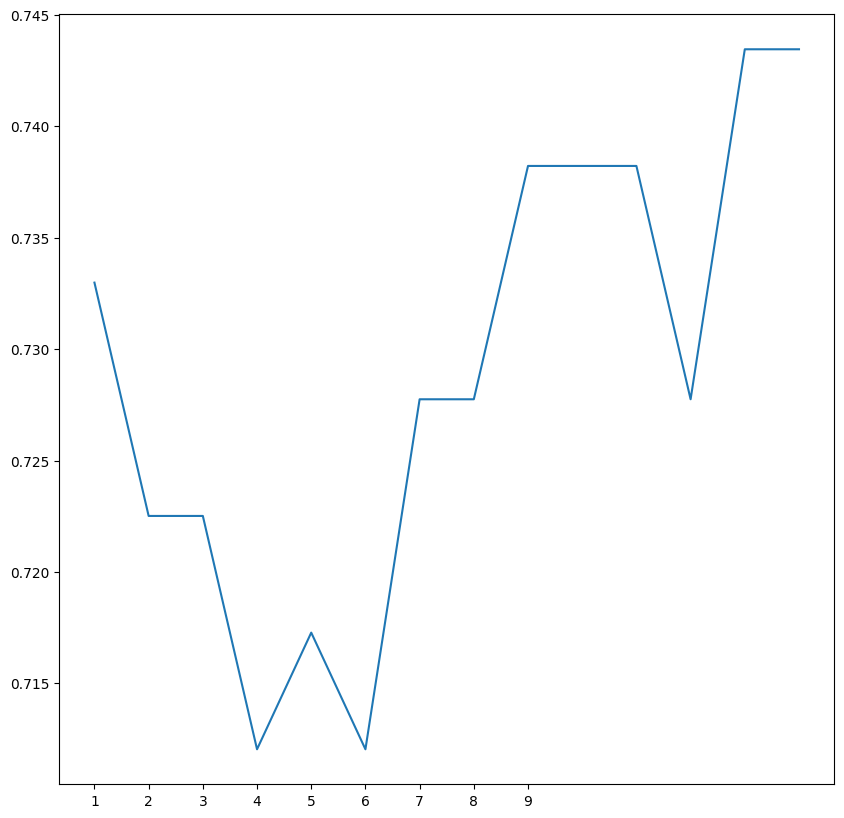

In [407]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(range(1,15),accuracy)
plt.xticks(range(1,10))
plt.show()

In [408]:
knn=KNeighborsClassifier(n_neighbors=besti)
model=knn.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[116   9]
 [ 40  26]]


In [409]:
TP = confusion_matrix(y_test,y_pred)[0][0]
FN = confusion_matrix(y_test,y_pred)[0][1]
FP = confusion_matrix(y_test,y_pred)[1][0]
TN =confusion_matrix(y_test,y_pred)[1][1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Doğruluk: {accuracy:.4f}")
print(f"Hassasiyet: {precision:.4f}")
print(f"Duyarlılık: {recall:.4f}")
print(f"F1 Skoru: {f1_score:.4f}")

Doğruluk: 0.7435
Hassasiyet: 0.7436
Duyarlılık: 0.9280
F1 Skoru: 0.8256
